### Importing libraries

In [2]:
import numpy as np
import pandas as pd
from time import time
import matplotlib.pyplot as plt
from IPython.display import Image
from matplotlib.pylab import rcParams
from sklearn import metrics
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.decomposition import PCA
from sklearn import kernel_approximation
from sklearn.linear_model import SGDClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.kernel_approximation import (RBFSampler,Nystroem)
from sklearn.ensemble import GradientBoostingClassifier,RandomForestClassifier
rcParams['figure.figsize'] = 15, 5
pd.set_option('display.max_columns', 500)

### Goal:
#### As a credit company, it is important to know beforehand who is able to pay their loans and who is not. The goal of this puzzle is to build a statistical/machine learning model to figure out which clients are able to honor their debt.

### Data Visualization and Feature Exploration
#### Let's load the training data for visualizing it and deciding the best way to use (or discard) each feature in the training of the classification model.

In [3]:
data_train = pd.read_csv('puzzle_train_dataset.csv')
data_test = pd.read_csv('puzzle_test_dataset.csv')
data_train.head()

,ids,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,reason,income,sign,gender,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,810e3277-619e-3154-7ba0-ebddfc5f7ea9,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,59869.05,virg,f,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,b4118fd5-77d5-4d80-3617-bacd7aaf1a88,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,46016.31,sagi,f,False,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,NaN
2,a75638f1-4662-4f4f-044a-d649b676d85d,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,48025.47,libr,m,True,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
3,285ce334-3602-42b3-51cb-eebfcba48a09,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,46011.12,NaN,m,False,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,NaN,0.0,0.0,5.0,NaN
4,e643bf65-9288-92f2-df13-eed631fe237c,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,90026.17,libr,m,NaN,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0


In [4]:
data_test.head()

,ids,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,reason,income,sign,gender,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,e4366223-7aa2-0904-7a47-66479ae46b2a,DGCQep2AE5QRkNCshIAlFQ==,osCzpM4hJrxugqWWuZmMWw==,230.0,101.906686,0.677760,77.245320,0.22,21016.38,36.0,43666.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,156021.02,NaN,m,True,GW2VZ3dN3OGHSjQ6JkfqQw==,gupRYCEwfV8MlD+HhQ9c3w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,73.0,0.0,0.0,15.0,15.0
1,c6416108-c6d7-e6be-c4b5-923dd36c8ec4,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,400.0,96.276632,0.278711,94.980774,0.13,1211.74,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,8410.56,sagi,f,False,0gQEZgRHqS5KSF3oWQrQfw==,ExyXSIu9zSfRKXY18ZnOGA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,39.0,0.0,0.0,11.0,NaN
2,a90d3929-86ec-2414-89ba-543776b0e82b,4DLlLW62jReXaqbPaHp1vQ==,pAzpxkhjPsjWldgSX21+zg==,420.0,98.901695,0.894661,108.136546,0.25,6990.63,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,45116.60,gemi,f,True,1DpYl6dtzY0qE33poow3iw==,886qU4ALtTVHJHC/UTfedg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,33.0,0.0,0.0,21.0,NaN
3,c5b96a7f-389a-28d0-242d-95db05e69da0,1Rk8w4Ucd5yR3KcqZzLdow==,dCm9hFKfdRm7ej3jW+gyxw==,490.0,95.975994,0.972729,126.120768,0.46,15025.67,60.0,71273.0,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,60029.26,aqua,f,True,7bX4XFXmYqoMspxup0CrKA==,QF6pl3PK1Zb0VJxw2R/HTA==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,12.0,0.0,0.0,10.0,10.0
4,1b461faa-926d-565d-b15d-0b452968ac81,8k8UDR4Yx0qasAjkGrUZLw==,d/7Hedyz7ovK9Pn1CYN4+A==,320.0,101.303601,0.234202,107.162760,0.29,7027.81,36.0,NaN,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,27618.96,gemi,m,False,xsd3ZdsI3356I3xMxZeiqQ==,sfVhE81w8VwY0KuIEpmLTg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,31.0,0.0,0.0,6.0,NaN


#### Let's verify the total number of possible values for each feature:

In [5]:
for column in list(data_train.columns):
    print("{0:25} {1}".format(column, data_train[column].nunique()))

ids                       64592
default                   2
score_1                   7
score_2                   35
score_3                   88
score_4                   64592
score_5                   64592
score_6                   64592
risk_rate                 82
amount_borrowed           53348
borrowed_in_months        2
credit_limit              28259
reason                    20345
income                    57430
sign                      12
gender                    2
facebook_profile          2
state                     50
zip                       830
channel                   1
job_name                  44604
real_state                5
ok_since                  104
n_bankruptcies            7
n_defaulted_loans         5
n_accounts                45
n_issues                  45


#### The only columns which showcase a different number for each ID are the float-valued ones. The columns "default"As unicas colunas que possuem um valor diferente para cada ID sao as que possuem valores do tipo 'float'. As colunas "default", "score_1", "score_2", "state", "zip", "channel", "job_name" and "real_state" will have to be converted to their numerical equivalents. Also, all NaN values of each column will be replaced by:
#### - Its mean, in the case of float-valued features;
#### - Its median, in the case of discrete-valued ones;
#### - And its mode, in the case of categorical ones.

In [6]:
data_train = data_train.drop(columns=["ids"])
for i in ["default","score_1","score_2","state", "zip", "channel", "job_name","real_state","borrowed_in_months","reason","sign","gender","facebook_profile"]:
    data_train[i].fillna(data_train[i].mode()[0], inplace=True)

for i in ["score_3", "score_4", "score_5", "score_6", "risk_rate", "amount_borrowed", "credit_limit","income"]:
    data_train[i].fillna(data_train[i].mean(), inplace=True)
    
for i in["ok_since", "n_bankruptcies", "n_defaulted_loans", "n_accounts", "n_issues"]:
    data_train[i].fillna(data_train[i].median(), inplace=True)

#data_test = data_test.drop(columns=["ids"])
for i in ["score_1","score_2","state", "zip", "channel", "job_name","real_state","borrowed_in_months","reason","sign","gender","facebook_profile"]:
    data_test[i].fillna(data_test[i].mode()[0], inplace=True)

for i in ["score_3", "score_4", "score_5", "score_6", "risk_rate", "amount_borrowed", "credit_limit","income"]:
    data_test[i].fillna(data_test[i].mean(), inplace=True)
    
for i in["ok_since", "n_bankruptcies", "n_defaulted_loans", "n_accounts", "n_issues"]:
    data_test[i].fillna(data_test[i].median(), inplace=True)

#### Visualizing the data after the transformations:

In [7]:
data_train.head()

,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,reason,income,sign,gender,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,False,smzX0nxh5QlePvtVf6EAeg==,tHpS8e9F8d9zg3iOQM9tsA==,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.00000,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,59869.05,virg,f,True,xsd3ZdsI3356I3xMxZeiqQ==,i036nmJ7rfxo+3EvCD7Jnw==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,14.0,1.0,0.0,9.0,9.0
1,False,DGCQep2AE5QRkNCshIAlFQ==,RO7MTL+j4PH2gNzbhNTq/A==,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,34562.00756,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,46016.31,sagi,f,False,xsd3ZdsI3356I3xMxZeiqQ==,oyrt7nHjoQSc58vCxgJF/w==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,n+xK9CfX0bCn77lClTWviw==,75.0,0.0,0.0,3.0,10.0
2,False,8k8UDR4Yx0qasAjkGrUZLw==,wkeCdGeu5sEv4/fjwR0aDg==,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,34562.00756,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,48025.47,libr,m,True,/L8vvVesB5WyAv190Hw/rQ==,BMIK35trMYhh9yVrcGg/oQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,32.0,0.0,0.0,5.0,10.0
3,False,4DLlLW62jReXaqbPaHp1vQ==,tQUTfUyeuGkhRotd+6WjVg==,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,34562.00756,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,46011.12,libr,m,False,GW2VZ3dN3OGHSjQ6JkfqQw==,coa2oOrpjxnQl4iyM7dTpQ==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,32.0,0.0,0.0,5.0,10.0
4,False,4DLlLW62jReXaqbPaHp1vQ==,7h8PTkrlTWUPP3yuyP4rUg==,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.00000,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,90026.17,libr,m,False,sjJbkqJS7cXalHLBFA+EOQ==,xTrDMEf/Cnewxc1LO+pfbg==,NCqL3QBx0pscDnx3ixKwXg==,mLVIVxoGY7TUDJ1FyFoSIZi1SFcaBmO01AydRchaEiGYtU...,N5/CE7lSkAfB04hVFFwllw==,15.0,0.0,0.0,10.0,10.0


#### Let's find the categorical features, for converting them into their numerical equivalents:

In [8]:
data_train.dtypes

default                  bool
score_1                object
score_2                object
score_3               float64
score_4               float64
score_5               float64
score_6               float64
risk_rate             float64
amount_borrowed       float64
borrowed_in_months    float64
credit_limit          float64
reason                 object
income                float64
sign                   object
gender                 object
facebook_profile         bool
state                  object
zip                    object
channel                object
job_name               object
real_state             object
ok_since              float64
n_bankruptcies        float64
n_defaulted_loans     float64
n_accounts            float64
n_issues              float64
dtype: object

In [9]:
for field in ["default","score_1","score_2","reason","sign","gender","state", "zip", "channel", "job_name","real_state","facebook_profile"]:
    data_train[field] = data_train[field].astype('category')
    data_train[field] = data_train[field].cat.codes
    
for field in ["score_1","score_2","reason","sign","gender","state", "zip", "channel", "job_name","real_state","facebook_profile"]:
    data_test[field] = data_test[field].astype('category')
    data_test[field] = data_test[field].cat.codes

#### Visualizing the data after the transformations:

In [10]:
data_test.head()

,ids,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,reason,income,sign,gender,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,e4366223-7aa2-0904-7a47-66479ae46b2a,3,26,230.0,101.906686,0.677760,77.245320,0.22,21016.38,36.0,43666.000000,8633,156021.02,2,1,1,18,561,0,19215,1,73.0,0.0,0.0,15.0,15.0
1,c6416108-c6d7-e6be-c4b5-923dd36c8ec4,1,7,400.0,96.276632,0.278711,94.980774,0.13,1211.74,36.0,33836.174889,6107,8410.56,8,0,0,4,207,0,19602,1,39.0,0.0,0.0,11.0,10.0
2,a90d3929-86ec-2414-89ba-543776b0e82b,1,27,420.0,98.901695,0.894661,108.136546,0.25,6990.63,36.0,33836.174889,5984,45116.60,4,0,1,6,123,0,10005,1,33.0,0.0,0.0,21.0,10.0
3,c5b96a7f-389a-28d0-242d-95db05e69da0,0,21,490.0,95.975994,0.972729,126.120768,0.46,15025.67,60.0,71273.000000,3446,60029.26,0,0,1,10,355,0,4303,3,12.0,0.0,0.0,10.0,10.0
4,1b461faa-926d-565d-b15d-0b452968ac81,2,20,320.0,101.303601,0.234202,107.162760,0.29,7027.81,36.0,33836.174889,8100,27618.96,4,1,0,44,721,0,11251,3,31.0,0.0,0.0,6.0,10.0


In [11]:
data_train.head()

,default,score_1,score_2,score_3,score_4,score_5,score_6,risk_rate,amount_borrowed,borrowed_in_months,credit_limit,reason,income,sign,gender,facebook_profile,state,zip,channel,job_name,real_state,ok_since,n_bankruptcies,n_defaulted_loans,n_accounts,n_issues
0,0,6,29,710.0,104.174961,0.661509,123.015325,0.43,20024.31,60.0,62386.00000,11764,59869.05,11,0,1,47,584,0,25129,3,14.0,1.0,0.0,9.0,9.0
1,0,3,15,330.0,97.880798,0.531115,110.913484,0.23,10046.51,36.0,34562.00756,2829,46016.31,8,0,0,47,681,0,20029,3,75.0,0.0,0.0,3.0,10.0
2,0,2,34,360.0,97.908925,0.611086,104.620791,0.30,21228.25,60.0,34562.00756,10852,48025.47,6,1,1,3,171,0,38745,1,32.0,0.0,0.0,5.0,10.0
3,0,1,30,120.0,100.434557,0.139784,120.134718,0.15,23032.33,36.0,34562.00756,13965,46011.12,6,1,0,20,505,0,7126,1,32.0,0.0,0.0,5.0,10.0
4,0,1,7,330.0,103.774638,0.002856,104.320462,0.08,24026.29,36.0,32366.00000,12442,90026.17,6,1,0,44,792,0,31080,1,15.0,0.0,0.0,10.0,10.0


#### Now, all the variables are numerical. Lets's split the instances from *puzzle_train_dataset.csv* into train and test sets, for choosing a classification model for predicting the boolean variable *default* for all the instances in the *puzzle_test_dataset.csv* file. We chose 0.7 and 0.3 for train and test ratios, respectively.

In [12]:
train_labels = data_train["default"].values
train_features = data_train.drop(columns=["default"])
train_features = train_features.values
test_features = data_test.values

x = np.array(data_train.drop(columns=["default"]))
y = np.array(data_train["default"])

x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.3,
random_state=1)

#### The following function will help us compare the performances the the classification models:

In [13]:
def model_performance(model_name, X_train, y_train, y_test, Y_pred):
    print('Model name: %s' % model_name)
    print('Test accuracy (Accuracy Score): %f' % metrics.accuracy_score(y_test, Y_pred))
    print('Test accuracy (ROC AUC Score): %f' % metrics.roc_auc_score(y_test, Y_pred))
    print('Train accuracy: %f' % clf.score(X_train, y_train))
    fpr, tpr, thresholds = metrics.precision_recall_curve(y_test, Y_pred)
    print('Area Under the Precision-Recall Curve: %f' % metrics.auc(fpr, tpr))
    false_positive_rate, true_positive_rate, thresholds = metrics.roc_curve(y_test, Y_pred)
    roc_auc = metrics.auc(false_positive_rate, true_positive_rate)
    plt.title('Receiver Operating Characteristic')
    plt.plot(false_positive_rate, true_positive_rate, 'b', label='AUC = %0.2f'% roc_auc)
    plt.legend(loc='lower right')
    plt.plot([0,1],[0,1],'r--')
    plt.xlim([-0.1,1.2])
    plt.ylim([-0.1,1.2])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()

#### Let's first analyze the performance of a Decision Tree classifier:

In [14]:
clf = DecisionTreeClassifier()
clf.fit(x_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best')

Model name: Decision tree classifier
Test accuracy (Accuracy Score): 0.762721
Test accuracy (ROC AUC Score): 0.550949
Train accuracy: 1.000000
Area Under the Precision-Recall Curve: 0.146020


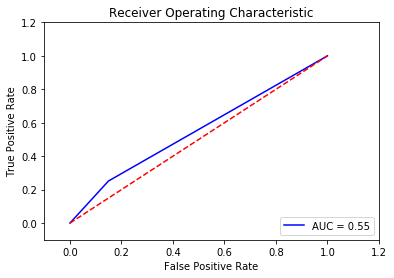

In [15]:
y_pred = clf.predict(x_test)
model_performance('Decision tree classifier', x_train, y_train, y_test, y_pred)

#### Now, let's analyze the performance of a Random Forest classifier (an Ensemble method):

In [16]:
clf = RandomForestClassifier()
clf.fit(x_train, y_train)

/home/rafaelglima/anaconda3/lib/python3.6/site-packages/sklearn/ensemble/forest.py:248: FutureWarning: The default value of n_estimators will change from 10 in version 0.20 to 100 in 0.22.
  "10 in version 0.20 to 100 in 0.22.", FutureWarning)


RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=None,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

Model name: Random Forest
Test accuracy (Accuracy Score): 0.849004
Test accuracy (ROC AUC Score): 0.515504
Train accuracy: 0.981355
Area Under the Precision-Recall Curve: 0.131505


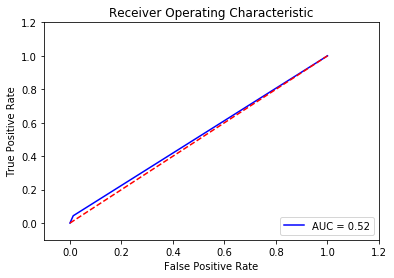

In [17]:
y_pred = clf.predict(x_test)
model_performance('Random Forest', x_train, y_train, y_test, y_pred)

#### Lastly, let's analyze a Gradient Boosting classifier. We perform a Grid Search over it for find the best parameters over a set of possible values for *n_estimators* and *max_depth*.

In [18]:
gbc = GradientBoostingClassifier(random_state=10, learning_rate=0.1,n_estimators=400, max_depth=10, max_features=10)
parameters = {'n_estimators':[100,200,300,400], 'max_depth':[5,6,7,8,9,10]}
clf = GridSearchCV(gbc, parameters, cv=5, verbose=1)
clf.fit(x_train, y_train)
y_pred = clf.predict(x_test)

Fitting 5 folds for each of 24 candidates, totalling 120 fits


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


KeyboardInterrupt: 

#### We can then easily check which combination of parameters resulted in the best performance:

In [198]:
clf.best_params_

{'max_depth': 5, 'n_estimators': 100}

Model name: Gradient Boosting
Test accuracy (Accuracy Score): 0.859273
Test accuracy (ROC AUC Score): 0.547758
Train accuracy: 0.867430
Area Under the Precision-Recall Curve: 0.280046


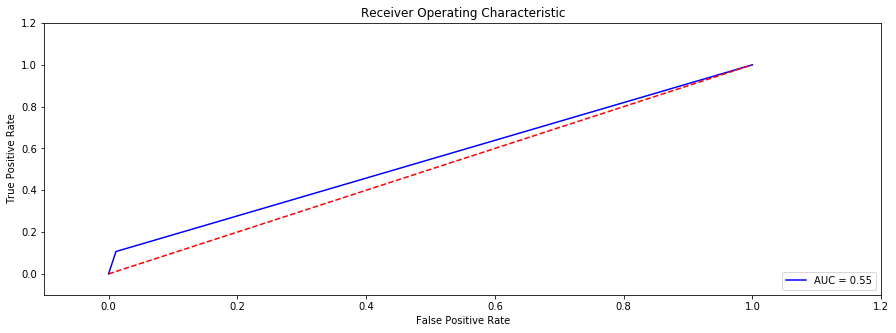

In [199]:
model_performance('Gradient Boosting', x_train, y_train, y_test, y_pred)

#### The Gradient Boosting Classifier showcased a superior performance over the previously trained models. Let's then try to predict the values of *default*  for the unlabelled data from the *puzzle_test_dataset.csv* file, and store them in the *predictions.csv* file, as required for the task instructions:

In [248]:
clf = GradientBoostingClassifier(random_state=10, learning_rate=0.1,n_estimators=100, max_depth=5, max_features=10)
clf.fit(x_train, y_train)
feature_names = ['score_1', 'score_2', 'score_3', 'score_4', 'score_5', 'score_6',
                 'risk_rate', 'amount_borrowed', 'borrowed_in_months', 'credit_limit', 
                 'reason', 'income', 'sign', 'gender', 'facebook_profile', 'state',
                 'zip', 'channel', 'job_name', 'real_state', 'ok_since',
                 'n_bankruptcies', 'n_defaulted_loans', 'n_accounts', 'n_issues']
for feature, score in zip(feature_names, list(clf.feature_importances_)):
        print('%s\t%f' %(feature, score))

score_1	0.104028
score_2	0.029313
score_3	0.020736
score_4	0.021712
score_5	0.017516
score_6	0.022270
risk_rate	0.035585
amount_borrowed	0.039882
borrowed_in_months	0.059712
credit_limit	0.023646
reason	0.022209
income	0.080467
sign	0.293031
gender	0.049743
facebook_profile	0.084593
state	0.010506
zip	0.017124
channel	0.000000
job_name	0.022870
real_state	0.005040
ok_since	0.013853
n_bankruptcies	0.002176
n_defaulted_loans	0.001358
n_accounts	0.010833
n_issues	0.011797


In [249]:
eval_features = data_test.drop(columns=["ids"])
eval_features = eval_features.values
eval_predictions = clf.predict(eval_features)

In [250]:
columns = ['ids','predictions']
id_columns = data_test['ids'].values
df_data = np.array([id_columns,eval_predictions])
df_1 = pd.DataFrame(df_data.T,columns=columns)

In [251]:
df_1.to_csv("predictions.csv", sep='\t')